In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#data = pd.read_csv('Taxi_Trips.csv')
df = pd.read_csv('Taxi_Trips.csv',usecols=['Trip Start Timestamp','Trip Seconds','Trip Miles','Pickup Community Area' ,'Dropoff Community Area'])
df.head()

,Trip Start Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area
0,01/01/2019 12:00:00 AM,885.0,3.45,NaN,NaN
1,01/01/2019 12:00:00 AM,8.0,0.00,NaN,NaN
2,01/01/2019 12:00:00 AM,960.0,4.90,NaN,NaN
3,01/01/2019 12:00:00 AM,420.0,1.50,NaN,NaN
4,01/01/2019 12:00:00 AM,420.0,0.50,NaN,NaN


In [3]:
df.dropna(subset=['Trip Start Timestamp','Pickup Community Area', 'Dropoff Community Area'],
          axis=0, # axis=0表示删除行；
          how='any', # how=any表示任意一个出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )
#df=df[df['Trip Seconds']!=0]
#df=df[df['Trip Miles']>=0.1]

In [4]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area
count,2.144582e+07,2.144744e+07,2.144840e+07,2.144840e+07
mean,8.925462e+02,3.606728e+00,2.686179e+01,2.345418e+01
std,1.490606e+03,6.434219e+00,2.100108e+01,1.839128e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.600000e+02,5.900000e-01,8.000000e+00,8.000000e+00
50%,6.000000e+02,1.300000e+00,2.800000e+01,2.400000e+01
75%,1.080000e+03,3.550000e+00,3.200000e+01,3.200000e+01
max,8.640000e+04,3.430530e+03,7.700000e+01,7.700000e+01


In [5]:
df["start"]=df["Trip Start Timestamp"].map(lambda x:x.split(" ")[0])
#df["start"]=pd.to_datetime(df["start"], format='%m/%d/%Y')
#df["year"]=df["start"].dt.isocalendar().year
#df["number of weeks"] =  df["start"].dt.isocalendar().week
#df['weekday'] = df['start'].dt.weekday+1
df=df[['Trip Seconds',"Trip Miles","Pickup Community Area","Dropoff Community Area","start"]]
df

,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,start
16,600.0,0.00,8.0,32.0,01/01/2019
18,1260.0,0.60,77.0,28.0,01/01/2019
19,120.0,0.30,32.0,32.0,01/01/2019
20,360.0,0.80,8.0,8.0,01/01/2019
22,360.0,1.00,8.0,8.0,01/01/2019
...,...,...,...,...,...
24302796,60.0,0.00,28.0,28.0,12/31/2021
24302797,60.0,0.00,76.0,76.0,12/31/2021
24302799,0.0,0.00,76.0,76.0,12/31/2021
24302800,382.0,0.73,8.0,8.0,12/31/2021


In [6]:
df["start"]=pd.to_datetime(df["start"], format='%m/%d/%Y')
df['days in year'] = df['start'].apply(lambda x:x.timetuple().tm_yday)

C:\ProgramData\Anaconda3\envs\SLDA\lib\site-packages\IPython\core\interactiveshell.py:3397: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


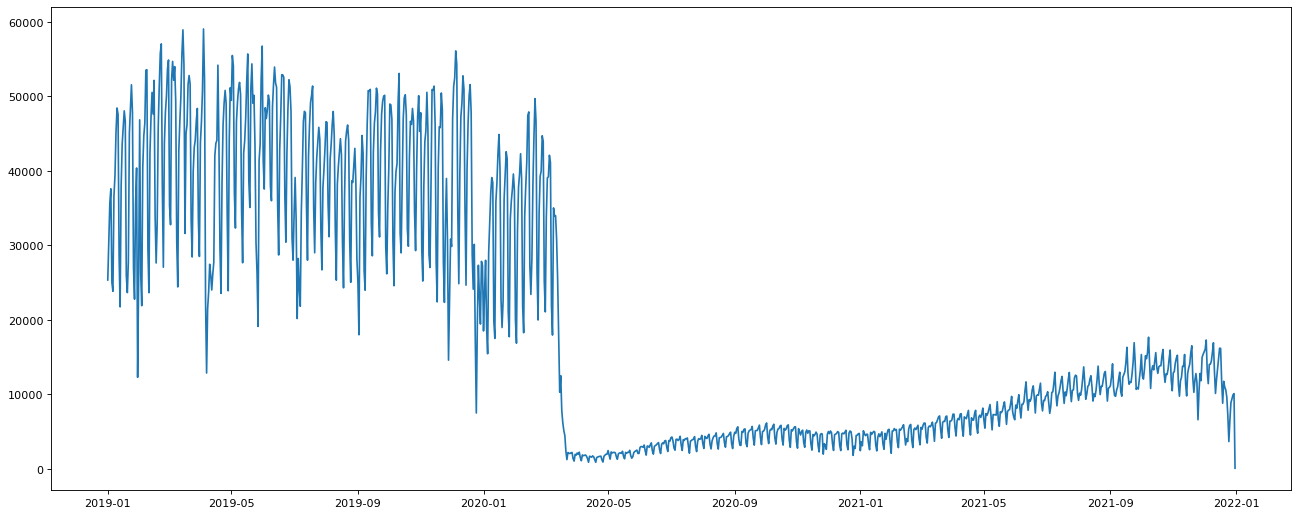

In [8]:
count=df['start'].value_counts()
x=pd.date_range('1/1/2019','31/12/2021')
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count[x])

In [7]:
count_area=df['Dropoff Community Area'].groupby(df['Pickup Community Area']).value_counts()
count_area

Pickup Community Area  Dropoff Community Area
1.0                    1.0                       35819
                       77.0                      14418
                       2.0                       13929
                       3.0                        8155
                       8.0                        7594
                                                 ...  
77.0                   54.0                          4
                       62.0                          4
                       52.0                          2
                       55.0                          1
                       74.0                          1
Name: Dropoff Community Area, Length: 5713, dtype: int64

In [8]:
od_list=[]
for i in range(1,78):
    for j in range(1,78):
        if (i,j) in count_area.index:
            if (count_area[i,j]>5000):
                od_list.append((i,j))


In [9]:
odtrips=[]
x=pd.date_range('1/1/2019','31/12/2021')
num_days=len(x)
for i in range(0,len(od_list)):   
    df_area=df[(df["Pickup Community Area"]==od_list[i][0])&(df["Dropoff Community Area"]==od_list[i][1])]
    count_area=df_area['start'].value_counts()
    #array=np.zeros(len(count_area))
    for j in range(1,num_days+1):
        if (x[j-1]) in count_area.index:
            #array[j-1]=count_area[j]
            odtrips.append(count_area[x[j-1]])
        else:
            odtrips.append(0)
            
s=int(len(odtrips)/num_days)
odtrips = np.mat(odtrips).reshape(s,num_days)
odtrips = np.array(odtrips)
odtrips

C:\ProgramData\Anaconda3\envs\SLDA\lib\site-packages\IPython\core\interactiveshell.py:3397: UserWarning: Parsing '31/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[ 66,  37,  41, ...,  20,  13,   0],
       [ 30,  22,  18, ...,   2,   8,   0],
       [ 34,   9,  10, ...,   7,   8,   0],
       ...,
       [  4,  22,  27, ...,   6,  12,   0],
       [  3,   8,  10, ...,   1,   6,   0],
       [105,  89, 133, ...,  45,  57,   0]], dtype=int64)

In [10]:
import sys
from clustering import DTWClustering

%matplotlib inline

In [20]:
model = DTWClustering(odtrips, 4)
model.train()

0.0008021999999527907 queue placement complete
663.9730829 computations complete
663.9765066 iteration complete
0.000795899999957328 queue placement complete
1005.4369638000001 computations complete
1005.4429255000002 iteration complete
0.0007123999998839281 queue placement complete
1186.3228247000002 computations complete
1186.3256062 iteration complete
0.000597499999912543 queue placement complete
1011.6694354999995 computations complete
1011.6721728999996 iteration complete
0.0005728999994971673 queue placement complete
769.9017578000003 computations complete
769.9044490999995 iteration complete
0.0005652999998346786 queue placement complete
695.2415282000002 computations complete
695.2440796999999 iteration complete
0.12069870000050287 queue placement complete
642.5889453 computations complete
642.5914818000001 iteration complete
0.0007230999999592314 queue placement complete
656.5248179 computations complete
656.5271805000002 iteration complete
0.0005694000001312816 queue placemen

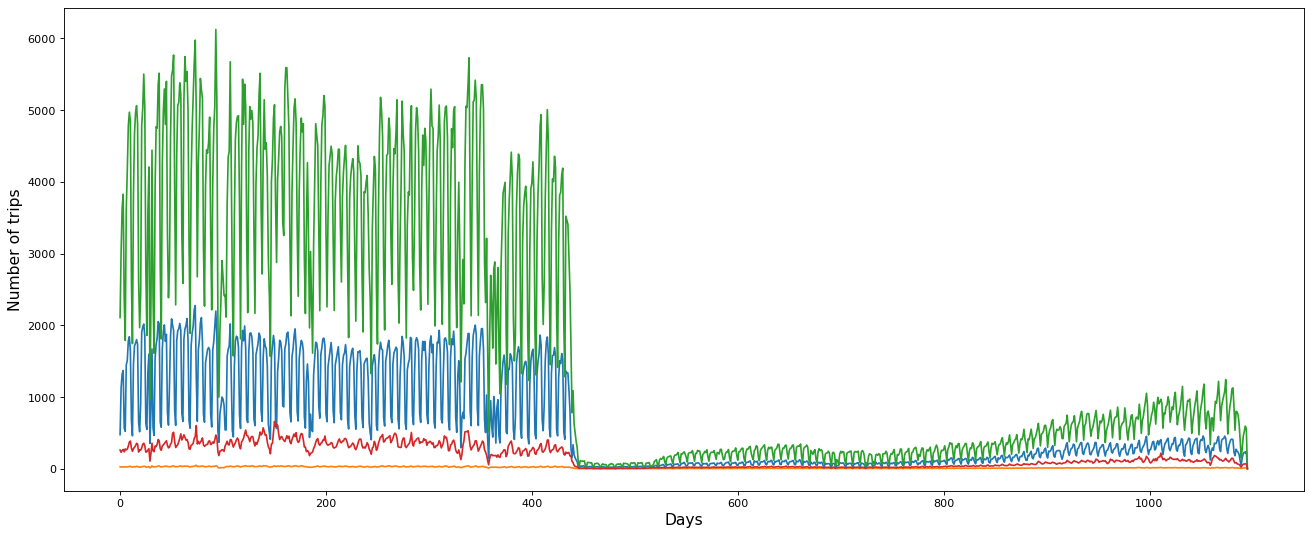

In [30]:
plt.figure(figsize=(20,8),dpi=80)
for centroid in model.centroids:    
    plt.plot(np.arange(len(centroid)), centroid)
    plt.xlabel('Days',fontsize=14)
    plt.ylabel('Number of trips',fontsize=14)

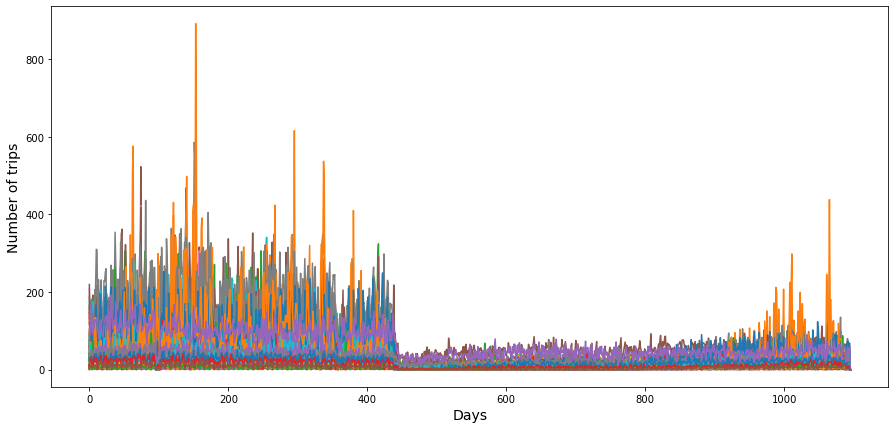

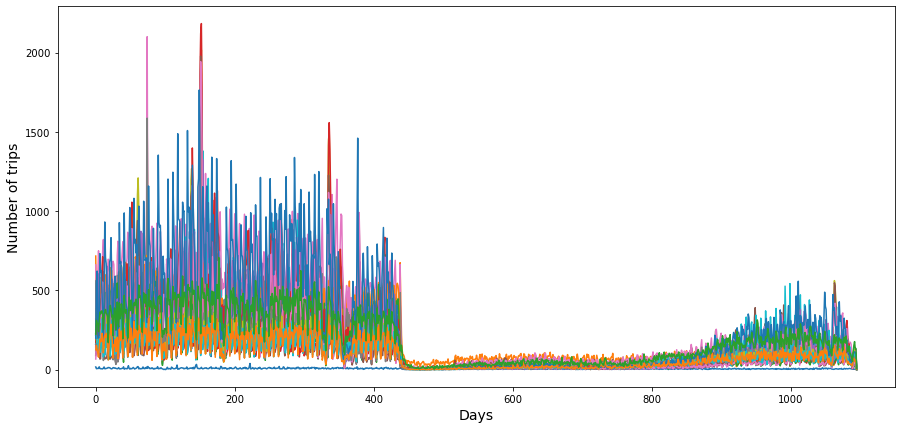

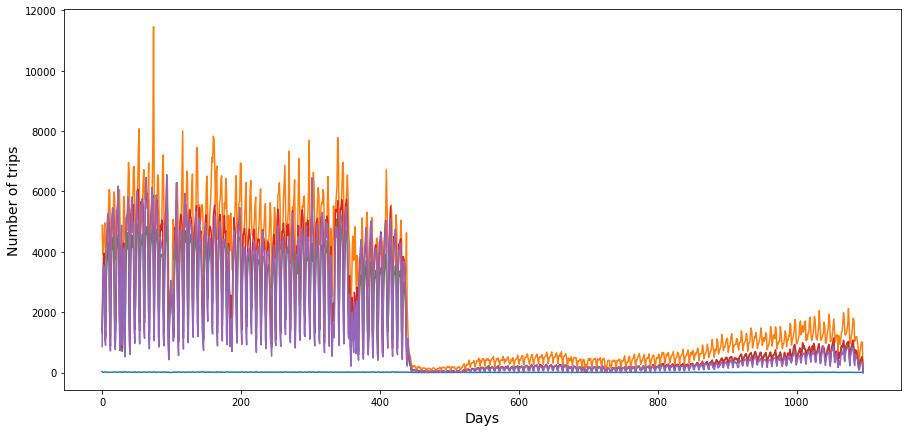

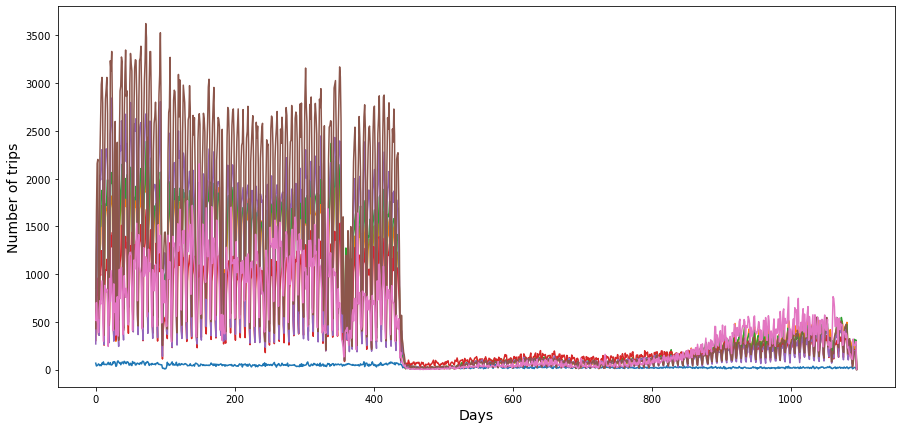

In [23]:
for centroid_key in model.clusters:
    plt.figure(figsize=(15,7))
    centroid = odtrips[centroid_key]
    plt.plot(np.arange(len(centroid)), centroid)
    plt.xlabel('Days',fontsize=14)
    plt.ylabel('Number of trips',fontsize=14)
    for series_index in model.clusters[centroid_key]:
        series = odtrips[series_index]
        plt.plot(np.arange(len(series)), series)
    
    plt.show()

In [11]:
model = DTWClustering(odtrips, 8)
model.train()

0.0006656999999847812 queue placement complete
1288.9550033 computations complete
1288.9679861 iteration complete
0.0005693999999039079 queue placement complete
1270.2214333 computations complete
1270.2252694000001 iteration complete
0.0005716999999094696 queue placement complete
1253.3114338999999 computations complete
1253.3150194 iteration complete
0.0005831000003126974 queue placement complete
1246.6943603 computations complete
1246.6980541000003 iteration complete
0.0005593999994744081 queue placement complete
1396.8624203 computations complete
1396.867569 iteration complete
0.0005923999997321516 queue placement complete
1512.366467499999 computations complete
1512.4038456000007 iteration complete
0.0012556000001495704 queue placement complete
1688.2254389000009 computations complete
1688.2786734000001 iteration complete
0.001039499999023974 queue placement complete
1918.8588946 computations complete
1918.934642099999 iteration complete
0.0012169000001449604 queue placement comple

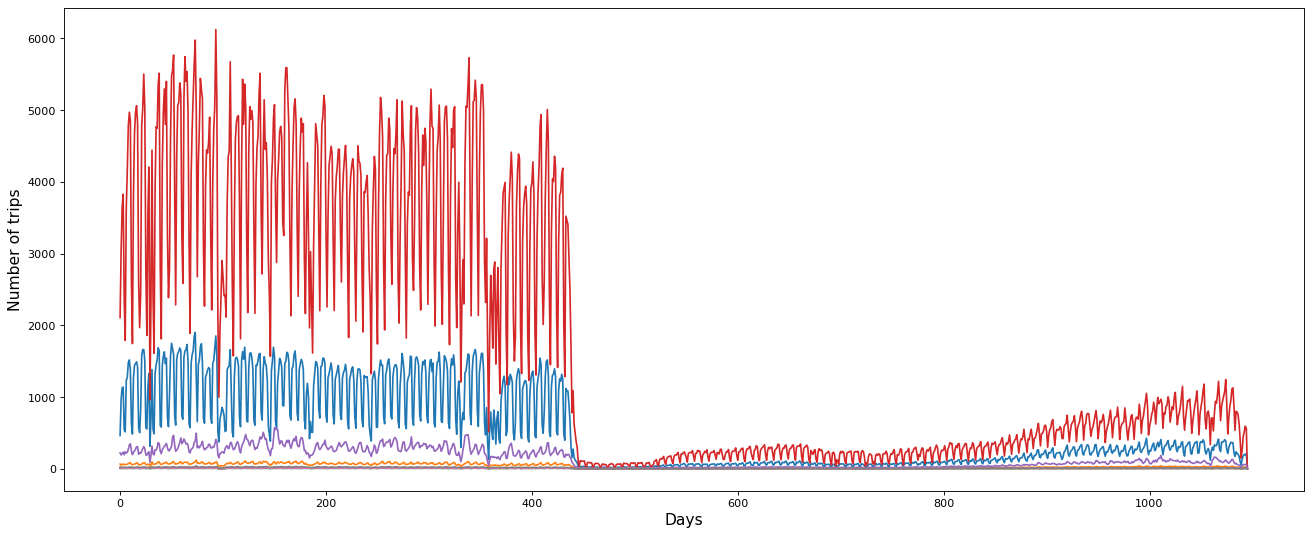

In [12]:
plt.figure(figsize=(20,8),dpi=80)
for centroid in model.centroids:    
    plt.plot(np.arange(len(centroid)), centroid)
    plt.xlabel('Days',fontsize=14)
    plt.ylabel('Number of trips',fontsize=14)

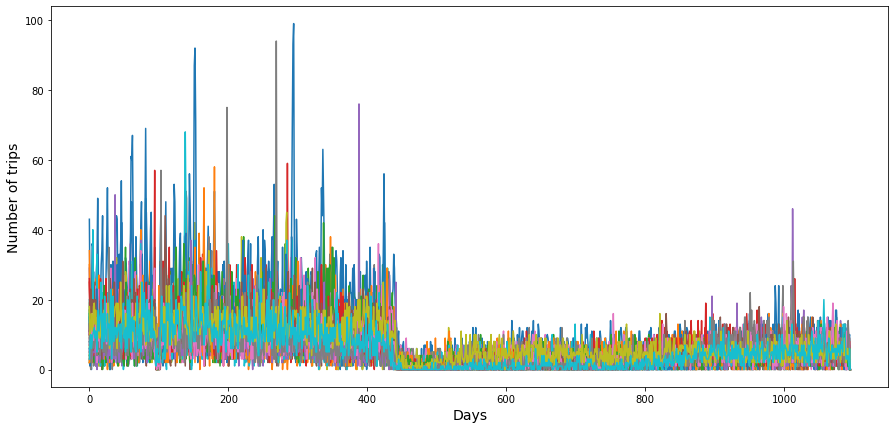

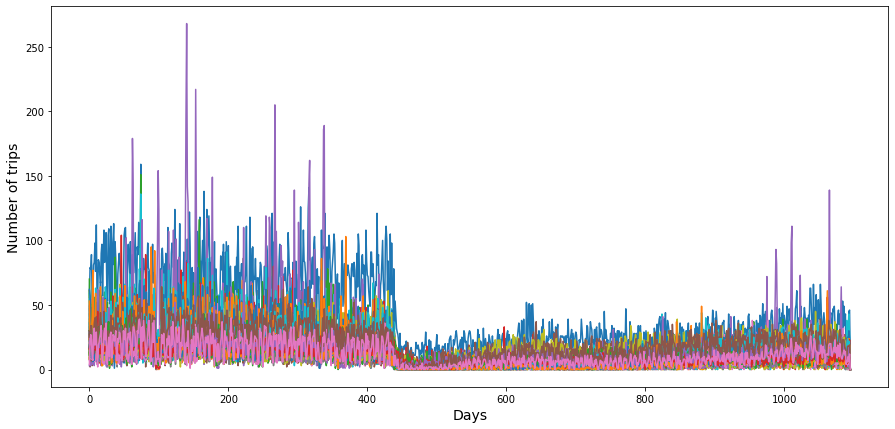

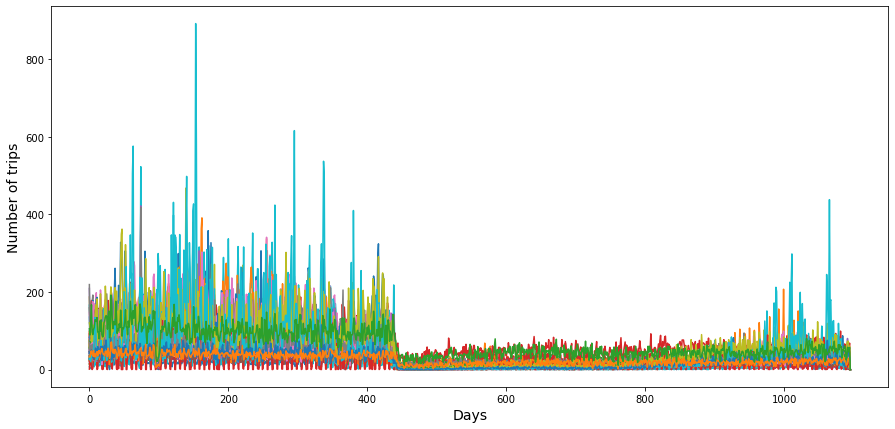

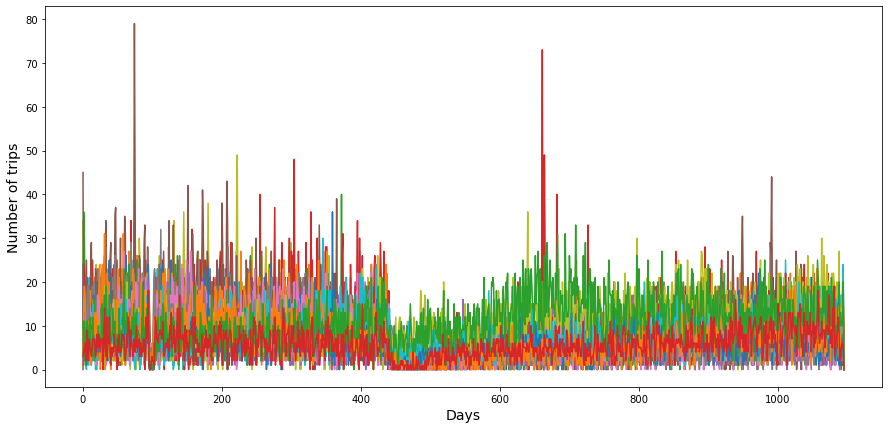

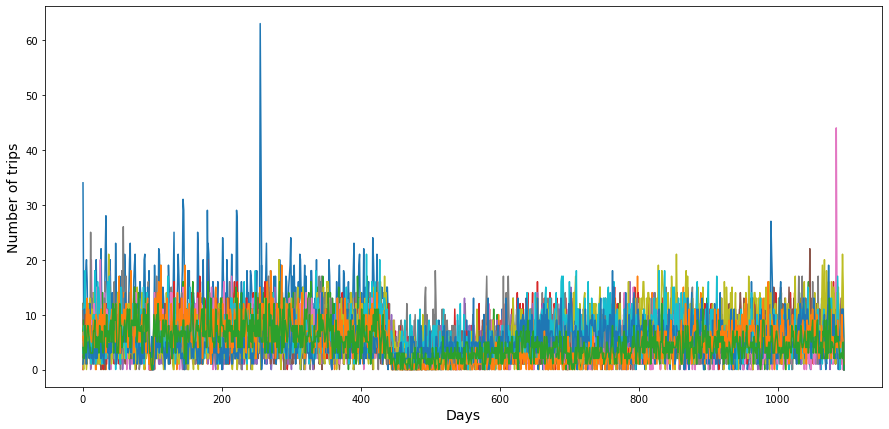

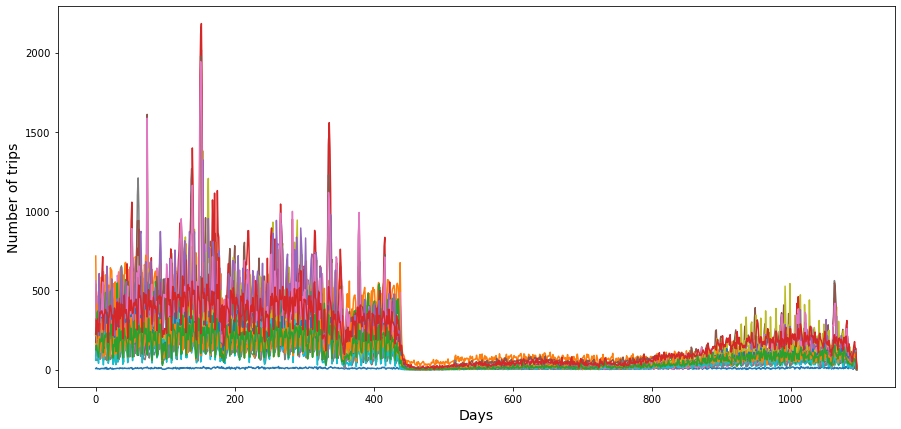

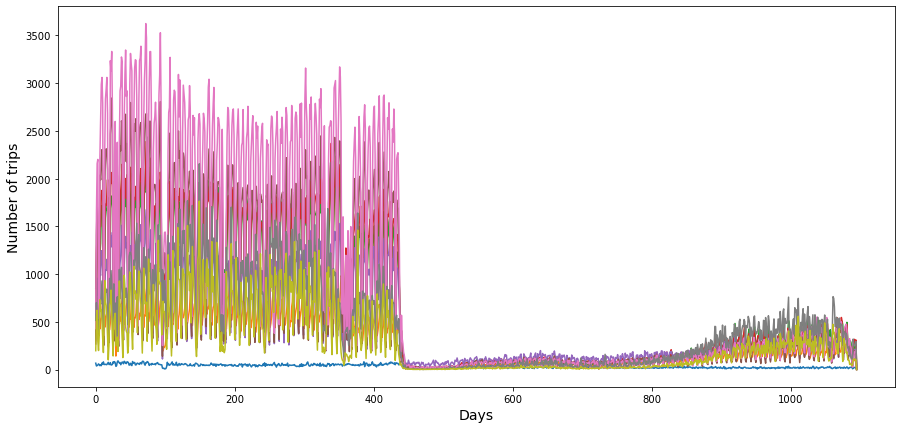

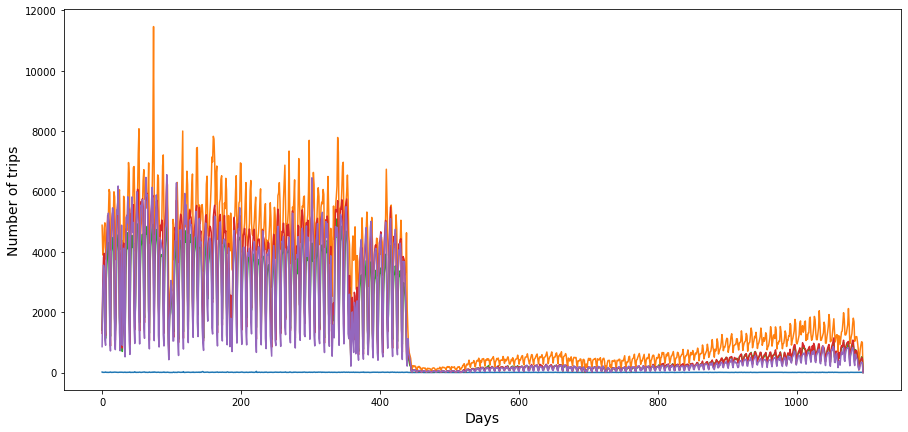

In [13]:
for centroid_key in model.clusters:
    plt.figure(figsize=(15,7))
    centroid = odtrips[centroid_key]
    plt.plot(np.arange(len(centroid)), centroid)
    plt.xlabel('Days',fontsize=14)
    plt.ylabel('Number of trips',fontsize=14)
    for series_index in model.clusters[centroid_key]:
        series = odtrips[series_index]
        plt.plot(np.arange(len(series)), series)
    
    plt.show()

In [15]:
model.clusters

{5: [2,
  3,
  9,
  17,
  21,
  23,
  26,
  28,
  38,
  43,
  46,
  55,
  68,
  82,
  87,
  90,
  93,
  92,
  98,
  109,
  111,
  113,
  127,
  138,
  145,
  161,
  164,
  165,
  167,
  171,
  173,
  176,
  200,
  207,
  220,
  221,
  233,
  239,
  245],
 7: [1,
  5,
  15,
  20,
  27,
  32,
  33,
  37,
  39,
  40,
  50,
  51,
  54,
  56,
  59,
  64,
  65,
  66,
  72,
  75,
  76,
  86,
  89,
  91,
  99,
  101,
  103,
  105,
  107,
  108,
  112,
  118,
  124,
  131,
  134,
  140,
  146,
  147,
  151,
  155,
  154,
  157,
  172,
  174,
  181,
  188,
  190,
  192,
  197,
  198,
  201,
  205,
  210,
  211,
  218,
  219,
  222,
  223,
  224,
  226,
  232,
  236,
  237,
  240,
  242,
  244],
 1: [0,
  7,
  14,
  16,
  18,
  22,
  25,
  31,
  35,
  41,
  42,
  44,
  45,
  47,
  52,
  53,
  58,
  60,
  67,
  79,
  81,
  84,
  94,
  96,
  100,
  104,
  106,
  114,
  115,
  126,
  135,
  139,
  141,
  148,
  158,
  160,
  163,
  168,
  175,
  202,
  204,
  206,
  208,
  212,
  213,
  214,
  227,


In [6]:
df["start"]= df["Trip Start Timestamp"].map(lambda x:x.split(" ")[0])
df["start_month"]= df["start"].map(lambda x:x.split("/")[0])
df["start_day"]= df["start"].map(lambda x:x.split("/")[1])
df["start_year"]= df["start"].map(lambda x:x.split("/")[2])

df

,Trip Start Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,start,start_month,start_day,start_year
0,01/05/2019 05:15:00 PM,1320.0,0.0,8.0,7.0,01/05/2019,01,05,2019
2,01/18/2019 05:15:00 PM,660.0,2.4,60.0,59.0,01/18/2019,01,18,2019
3,01/01/2019 02:30:00 AM,600.0,0.0,8.0,8.0,01/01/2019,01,01,2019
4,01/01/2019 01:15:00 AM,180.0,0.6,32.0,32.0,01/01/2019,01,01,2019
5,01/01/2019 03:30:00 AM,900.0,0.0,6.0,21.0,01/01/2019,01,01,2019
...,...,...,...,...,...,...,...,...,...
27242131,04/24/2019 09:00:00 AM,660.0,0.0,33.0,32.0,04/24/2019,04,24,2019
27242135,04/24/2019 01:00:00 PM,1080.0,0.0,46.0,41.0,04/24/2019,04,24,2019
27242141,04/24/2019 08:15:00 PM,720.0,1.8,32.0,33.0,04/24/2019,04,24,2019
27242146,04/24/2019 09:15:00 AM,2580.0,14.9,24.0,76.0,04/24/2019,04,24,2019


In [35]:
df['start_month'].groupby(df['start_year']).value_counts()

start_year  start_month
2019        03             1373478
            05             1373012
            06             1333869
            10             1292839
            08             1202934
            02             1191405
            09             1190787
            07             1178557
            12             1138491
            04             1131694
            11             1120868
            01             1101458
2020        02             1007904
            01              967104
            03              499829
            10              153818
            09              140936
            12              129882
            11              123548
            08              122958
            07              113573
            06               90548
            05               62702
            04               48140
2021        10              427232
            11              382651
            12              373542
            09              367

In [10]:
df["Pickup Community Area"].value_counts()

8.0     7188584
32.0    6081799
28.0    2662505
76.0    2175877
6.0      861377
         ...   
64.0       4216
57.0       3869
18.0       3461
9.0        2963
74.0       1977
Name: Pickup Community Area, Length: 77, dtype: int64

In [49]:
newcols=['01','02','03','04','05','06','07','08','09','10','11','12']

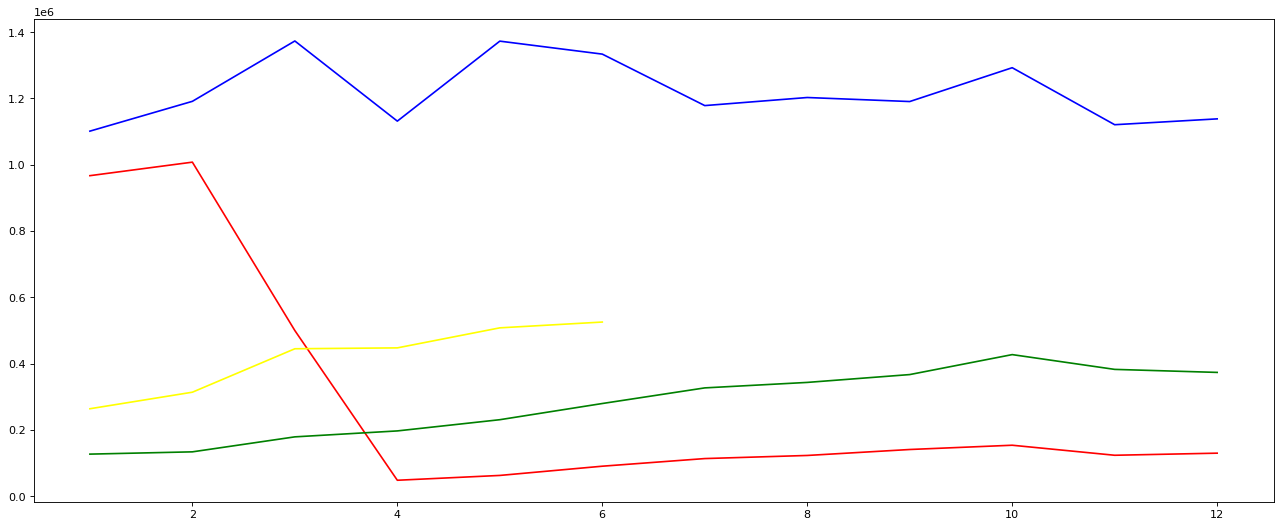

In [63]:
count=df['start_month'].groupby(df['start_year']).value_counts()
y2019=[]
y2020=[]
y2021=[]
y2022=[]
for index in range(12):
    y2019.append(count['2019'][newcols[index]])
    y2020.append(count['2020'][newcols[index]])
    y2021.append(count['2021'][newcols[index]])

for index in range(6):
    y2022.append(count['2022'][newcols[index]])
    
x=list(range(1,13))
x1=list(range(1,7))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,y2019,c='blue')
plt.plot(x,y2020,c='red')
plt.plot(x,y2021,c='green')
plt.plot(x1,y2022,c='yellow')
plt.show()

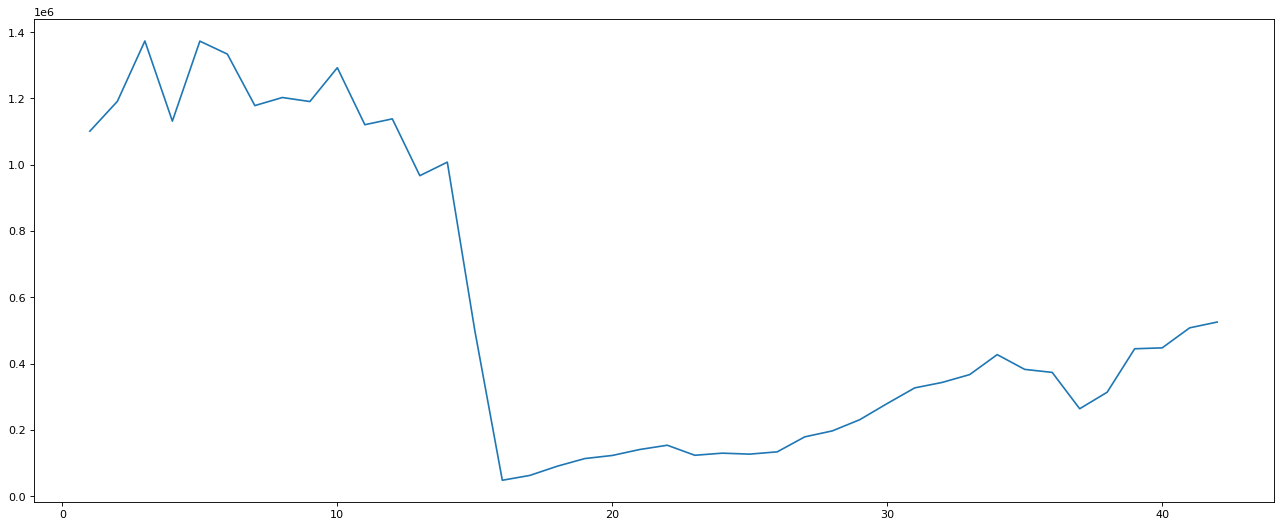

In [44]:
y=y2019+y2020+y2021+y2022
x=list(range(1,43))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,y)
plt.show()

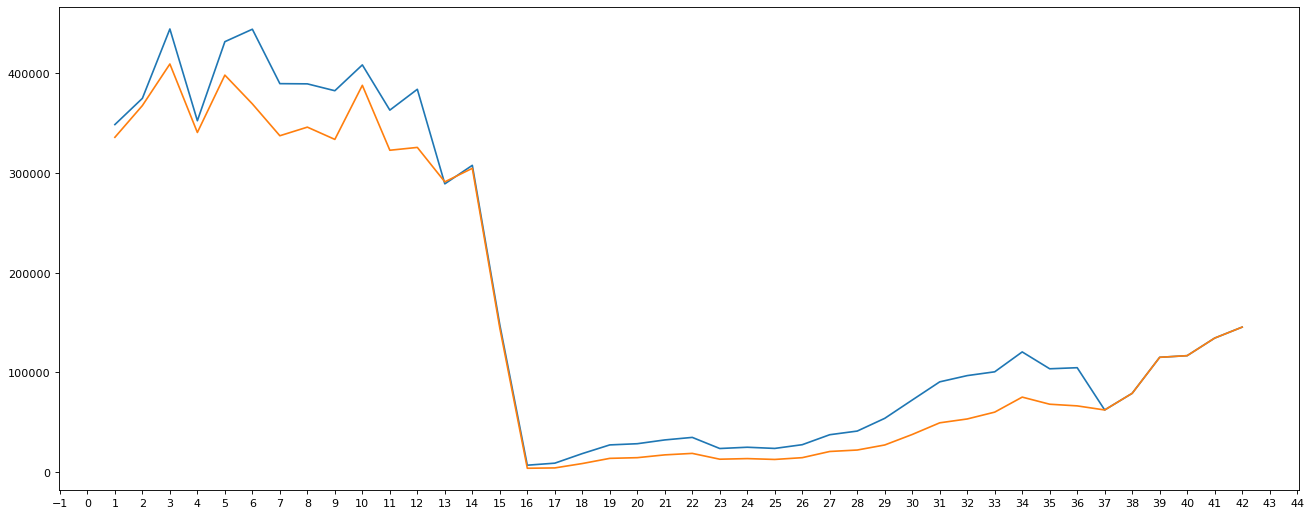

In [65]:
df8=df[df["Pickup Community Area"]==8]
count8=df8['start_month'].groupby(df8['start_year']).value_counts()
df32=df[df["Pickup Community Area"]==32]
count32=df32['start_month'].groupby(df32['start_year']).value_counts()
y2019_8=[]
y2020_8=[]
y2021_8=[]
y2022_8=[]
y2019_32=[]
y2020_32=[]
y2021_32=[]
y2022_32=[]
for index in range(12):
    y2019_8.append(count8['2019'][newcols[index]])
    y2020_8.append(count8['2020'][newcols[index]])
    y2021_8.append(count8['2021'][newcols[index]])
    
    y2019_32.append(count32['2019'][newcols[index]])
    y2020_32.append(count32['2020'][newcols[index]])
    y2021_32.append(count32['2021'][newcols[index]])

for index in range(6):
    y2022_8.append(count8['2022'][newcols[index]])
    y2022_32.append(count8['2022'][newcols[index]])
y_8=y2019_8+y2020_8+y2021_8+y2022_8
y_32=y2019_32+y2020_32+y2021_32+y2022_32


In [11]:
from matplotlib.pyplot import MultipleLocator

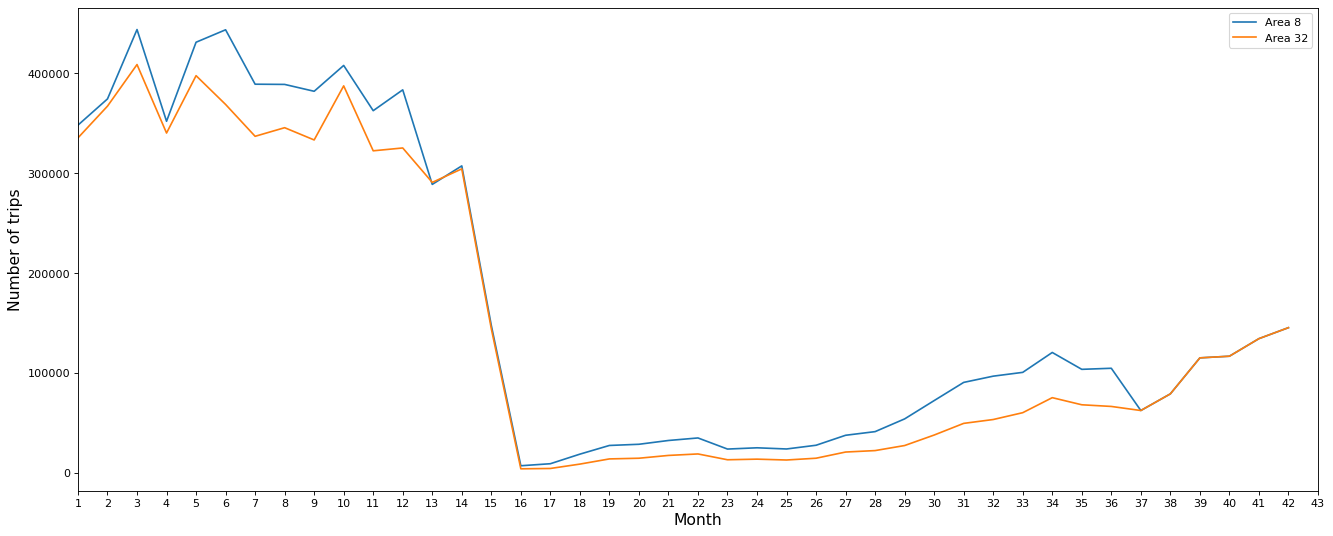

In [70]:
x=list(range(1,43))
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,y_8,label='Area 8')
plt.plot(x,y_32,label='Area 32')
x_major_locator=MultipleLocator(1)
#把x轴的刻度间隔设置为1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数

plt.xlabel('Month',fontsize=14)
plt.ylabel('Number of trips',fontsize=14)
plt.xlim(1,43)
plt.legend()
plt.show()
